## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [63]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv('data/human_body_temperature.csv')
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Exercise:
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Question 1:

Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

Solution:

We calculate the descriptive statisitics for the variable temperature. This includes finding the mean, median, mode, standard deviation, skewness and kurtosis. Since, the mean = median = mode and the values of skewness and kurtosis are approximately equal to zero (within 1 to -1), we can say that the distrubution of body temperatures is normal.

In [139]:
median= df['temperature'].median()
median

98.3

In [140]:
mean = df['temperature'].mean()
mean

98.24923076923078

In [141]:
mode=df['temperature'].mode()
mode

0    98.0
dtype: float64

In [58]:
skewness = df['temperature'].skew()
skewness

-0.0044191311689957711

In [59]:
kurtosis = df['temperature'].kurt()
kurtosis

0.78045739503373746

Plotting Kernel Density estimation for the variable temperature, we see that it follows a normal distribution.

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


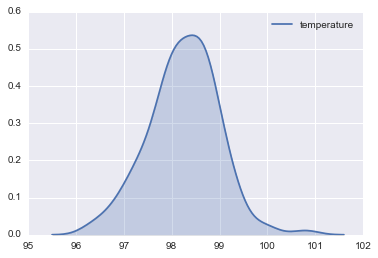

In [26]:
sns.kdeplot(df.temperature,shade=True)


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


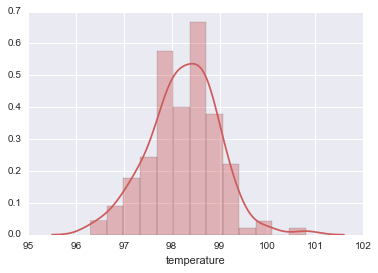

In [42]:
sns.distplot(df.temperature.dropna(),color=sns.desaturate("indianred",1))

To check for normality, we peform the Shapiro-Wilk test. Our null hypothesis is that the variable temperature is normally distributed.

In [77]:
test_statistic, p_value= stats.shapiro(df.temperature)
print("Test statistic is:" ,test_statistic)
print("P-value is:" ,p_value)

Test statistic is: 0.9865770936012268
P-value is: 0.233174666762352


Since the p-value is 0.233 which is greater than our significance level of 0.05, we fail to reject the null hypothesis that the distribution is normal.

Question 2:

Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

Solution:
Null Hypothesis Ho: The true population mean is 98.6, utruepop=98.6
Alternate Hypothesis Ha: The true population mean is less than 98.6, utruepop < 98.6 (1-tailed test)

Since the population standard deviation is not known, we will perfom an one-sample t-test. 

In [80]:
Sample_mean =df['temperature'].mean()
Sample_mean

98.24923076923078

In [85]:
t_statistic, p_value = stats.stats.ttest_1samp(df['temperature'], 98.6)
print("t statistic is:" ,t_statistic)
print("P-value is:" ,p_value)

t statistic is: -5.45482329236
P-value is: 2.41063204156e-07


Since the p-value is less than our significance level of 0.05, we reject the null hypothesis that the true population of the mean is 98.6. This provides proof for our alternative hypothesis that the true population mean could be less than 98.6.

Question 3:

At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

Solution:
Standard error is the standard deviation of the sampling distribution.

In [87]:
Std_error= df.temperature.std()

For 95% confidence interval, the critical z value is 1.96. We can calculate the Margin of error by multiplying this critical value with the standard error.

In [89]:
Margin_of_error = 1.96*Std_error
Margin_of_error

1.437038989756333

The confidence interval can be obtained using the below formula:

In [104]:
CI = [mean - 1.437, mean + 1.437]
CI

[96.81223076923078, 99.68623076923078]

Any temperature that falls outside this range will be considered as an abnormal temperature. 

Question 4:

Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

Solution:

We filter out the number of males and females in this dataset. The number of males and females are 65 each.

Null Hypothesis Ho: There is no difference in the normal temperature of male and female. i.e umale-ufemale=0 i.e. umale=ufemale

Alternate Hypothesis Ha: There is a difference in the normal temperature of male and female. i.e umale-ufemale!=0 i.e. umale!=ufemale

In [134]:
male= df[df["gender"]=="M"]["temperature"]

In [135]:
female= df[df["gender"]=="F"]["temperature"]

In [124]:
male_count=male.count()
male_count

65

In [125]:
male_mean= male.mean()

In [132]:
stdm= male.std()
stdm

0.6987557623265908

In [127]:
female_count=female.count()
female_count

65

In [128]:
female_mean = female.mean()

In [131]:
stdf=female.std()
stdf

0.7434877527313665

Since we want to know about the difference between the two groups, we perform a 2 sample or an independent sample t-test.

In [133]:
t_statistic, p_value = stats.stats.ttest_ind(male, female)
print("t statistic is:" ,t_statistic)
print("P-value is:" ,p_value)

t statistic is: -2.28543453817
P-value is: 0.0239318831224


Since the p value is 0.023 which is less than our significance level of 0.05, we reject the null hypothesis that there is no difference in the normal temperatures of male and female. 